# Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§ ÎßåÎì§Í∏∞

## 1. Ïä§Ìã∞Ïª§ÏôÄ ÏÇ¨ÏßÑ Íµ¨ÌïòÍ∏∞
Í≥†ÏñëÏù¥ ÏàòÏóº Ïù¥ÎØ∏ÏßÄÎ•º Îã§Ïö¥Î°úÎìú Î∞õÍ≥†, ÏÖÄÏπ¥ Ïù¥ÎØ∏ÏßÄÎ•º Ï¥¨ÏòÅÌïúÎã§. ÏÖÄÏπ¥ Ïù¥ÎØ∏ÏßÄÎ•º OpenCVÎ°ú Î∂àÎü¨ÏôÄ Ïù¥ÎØ∏ÏßÄ Í∞ÄÎ°ú ÏÑ∏Î°úÏùò ÎπÑÏú®Ïóê Îî∞Îùº Î≥ÄÍ≤ΩÌïúÎã§.

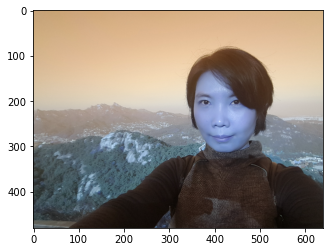

In [1]:
# import cv2, matplotlib, numpy, os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/2.jpg'
img_bgr = cv2.imread(my_image_path) #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÍ∏∞
img_bgr = cv2.resize(img_bgr, (640, 480)) # 640x480 Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy() #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_bgr)
plt.show()

opencvÎäî BGRÏùÑ ÏÇ¨Ïö©ÌïòÎØÄÎ°ú ÏõêÎ≥∏ ÏÇ¨ÏßÑÏóêÏÑú Î∂âÏùÄÏÉâÏùÄ Ìë∏Î•∏ÏÉâÏúºÎ°ú, Ìë∏Î•∏ÏÉâÏùÄ Î∂âÏùÄ ÏÉâÏúºÎ°ú Î∞îÎÄåÏñ¥ Ï∂úÎ†•ÌïúÎã§. Îî∞ÎùºÏÑú RGBÎ°ú ÏÉâÍπî Î≥¥Ï†ïÏ≤òÎ¶¨Î•º ÌïúÎã§. 

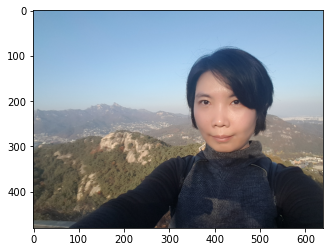

In [2]:
# ÏÉâ Î≥¥Ï†ïÏ≤òÎ¶¨
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. ÏñºÍµ¥ Í≤ÄÏ∂ú & ÎûúÎìúÎßàÌÅ¨ Í≤ÄÏ∂ú 

### 1) bound box ÏúÑÏπò Ï∞æÍ∏∞     
detectorÎ•º ÏÇ¨Ïö©Ìï¥ ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∞æÍ≥†, cvtColor()Î•º Ïù¥Ïö©ÌïòÏó¨ opencvÏùò BRG Ïù¥ÎØ∏ÏßÄÎ•º RGBÎ°ú Î∞îÍæ∏ÏóàÎã§. detector_hogÏùò Îëê Î≤àÏß∏ ÌååÎùºÎØ∏ÌÑ∞Îäî Ïù¥ÎØ∏ÏßÄ ÌååÎùºÎØ∏ÌÑ∞Ïùò ÏàòÏù∏Îç∞, Ïù¥ÎØ∏ÏßÄÎ•º upsampling Î∞©Î≤ïÏúºÎ°ú ÌÅ¨Í∏∞Î•º ÌÇ§Ïö∞Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§. 

In [3]:
# dlibÌôúÏö©Ìïú hog detcter ÏÑ†Ïñ∏
import dlib
detector_hog = dlib.get_frontal_face_detector() #- detector ÏÑ†Ïñ∏
print("üå´üõ∏")

# bounding box Ï∂îÏ∂ú
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # BRG -> RGB
dlib_rects = detector_hog(img_rgb, 1) #- (image, num of img pyramid)
print("üå´üõ∏")

üå´üõ∏
üå´üõ∏


Ï∞æÏùÄ ÏñºÍµ¥ÏùÑ ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïúÎã§. dlib detectorÎäî dlib.rectangles ÌÉÄÏûÖÏùò Í∞ùÏ≤¥Î•º Î∞òÌôòÌïòÍ≥†, dib.rectangle Í∞ùÏ≤¥Îäî left(), top(), right(), bottom() Îì± Î©§Î≤ÑÌï®ÏàòÎ•º Ìè¨Ìï®ÌïúÎã§. 

rectangles[[(339, 167) (494, 322)]]


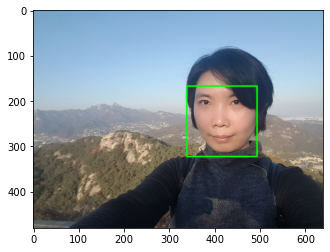

In [4]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï¢åÌëúÎ°ú ÌëúÏãú
print(dlib_rects) 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- ÏñºÍµ¥ Ïù∏ÏãùÏù¥ ÎêòÏßÄ ÏïäÎäî ÏÇ¨ÏßÑÏù¥ ÏûàÏóàÎäîÎç∞, Ïù¥ÎØ∏ÏßÄÏùò ÏÇ¨Ïù¥Ï¶àÎ•º Î≥ÄÍ≤ΩÌï¥ Ï£ºÏûê bounding boxÍ∞Ä ÎÇòÏôîÎã§.

### 2) landmark ÏúÑÏπò Ï∞æÍ∏∞     
Ïù¥Î™©Íµ¨ÎπÑÏùò ÏúÑÏπòÎ•º Ï∂îÎ°†ÌïòÎäî Í≤ÉÏùÄ face landmark localization Í∏∞Ïà†Ïù¥Î©∞, face landmarkÎäî bounding boxÎ°ú ÏûòÎùºÎÇ∏ ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄÎ•º ÏÇ¨Ïö©ÌïúÎã§. Ïó¨Í∏∞ÏÑúÎäî bottom-up ÏïåÍ≥†Î¶¨Ï¶ò(Ï†ÑÏ≤¥Ïùò keypointÎ•º Î®ºÏ†Ä Ï∞æÍ≥† pointÏùò Í¥ÄÍ≥ÑÎ•º Íµ∞ÏßëÌôîÌïòÏó¨ boxÎ•º ÏÉùÏÑ±)Í≥º DlibÏùò Ï†úÍ≥µÎêòÎäî Î™®Îç∏(300-W Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌïôÏäµÌïú pretrained model)ÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÎã§. 

In [5]:
# landmark Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

# landmark predictor
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # .part():(x,y)ÌòïÌÉúÎ°ú Ï†ëÍ∑ºÌïòÎèÑÎ°ù Î≥ÄÌôò
    list_landmarks.append(list_points) #list_points: tuple(x,y) 68Í∞úÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Î¶¨Ïä§Ìä∏

print(len(list_landmarks[0])) #68Í∞ú ÎûúÎìúÎßàÌÅ¨Í∞Ä Ï†ÄÏû•Îêú list_landmark

üå´üõ∏
68


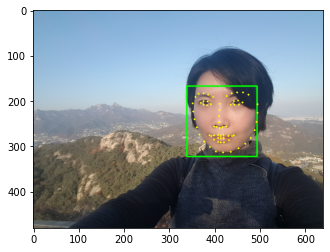

In [6]:
# ÎûúÎìúÎßàÌÅ¨Î•º ÏòÅÏÉÅÏóê Ï∂úÎ†•
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÏúÑÏπò ÌôïÏù∏
Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©ÌïòÎ†§Î©¥ ÏñºÍµ¥ÏúÑÏπò, Ïπ¥Î©îÎùºÏùò Í±∞Î¶¨Ïóê Îî∞Îùº ÌîΩÏÖÄ xÍ∞Ä Îã§Î•¥ÎØÄÎ°ú ÎπÑÏú®Î°ú Í≥ÑÏÇ∞Ìï¥Ïïº ÌïúÎã§. Í≥ÑÏÇ∞Ìï† ÏàòÏπòÎäî Ïä§Ìã∞Ïª§ ÏúÑÏπòÏôÄ Ïä§Ìã∞Ïª§ ÌÅ¨Í∏∞Ïù¥Îã§. ÏΩî(30)Î•º Í∏∞Ï§ÄÏ†êÏúºÎ°ú Ïû°Í≥†, (ÏΩîÏôÄ ÎààÍº¨Î¶¨(36)ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨)\*2Î•º ÎÑàÎπÑ, (ÏûÖÍº¨Î¶¨(48)ÏôÄ Î≥º(2)ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨)\*2)Î•º ÎÜíÏù¥Î°ú Í≥ÑÏÇ∞ÌïòÏòÄÎã§. (Ïà´ÏûêÎ°úÎßå ÏÉùÍ∞ÅÌïòÎ†§Îãà ÏÉÅÏÉÅÏù¥ Ïûò Ïïà ÎêòÏñ¥ÏÑú landmark Ï¢åÌëúÎ•º ÎùÑÏõåÎÜìÏùÄ ÌõÑ Í∑∏Î¶ºÏùÑ Í∑∏Î†§ Í≥ÑÏÇ∞ÌñàÎã§.)

[Facial landmark]<img src="https://cdn-images-1.medium.com/max/800/1*96UT-D8uSXjlnyvs9DZTog.png" width="300px" height="300px">

In [7]:
# Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] 
    w = (landmark[30][0] - landmark[36][0])*2
    h = (landmark[48][1] - landmark[2][1])*2
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(410, 247)
(x,y) : (410,247)
(w,h) : (80,70)


Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÍ≥† ÏúÑÏóêÏÑú Í≥ÑÏÇ∞Ìïú ÌÅ¨Í∏∞(ÎÑàÎπÑÏôÄ ÎÜíÏù¥)Î°ú ÏÇ¨Ïù¥Ï¶àÎ•º Î≥ÄÍ≤ΩÌïòÏòÄÎã§.

In [8]:
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ resize 
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)  # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
img_sticker = cv2.resize(img_sticker, (w,h))  # Ïù¥ÎØ∏ÏßÄ resize
print (img_sticker.shape)

(70, 80, 3)


ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ x, yÏ¢åÌëúÎ•º Ï°∞Ï†ïÌïòÏòÄÎã§. Ïù¥ÎØ∏ÏßÄÏùò ÏãúÏûëÏ†êÏùÄ top-leftÏù¥Îã§. Ïó¨Í∏∞ÏÑúÎäî Ï°∞Ï†ïÎêú x, yÏ¢åÌëúÍ∞Ä Î™®Îëê ÏñëÏàòÏù¥ÎØÄÎ°ú ÏùåÏàòÏóê ÎåÄÌïú ÏòàÏô∏Ï≤òÎ¶¨Î•º ÌïòÏßÄ ÏïäÏïòÎã§. (x, yÏùò Ï¢åÌëúÎ•º Ï°∞Ï†ïÌïòÎäî Î∂ÄÎ∂ÑÎèÑ ÏâΩÏßÄ ÏïäÏïÑ Í∑∏Î¶ºÏùÑ Í∑∏Î†§ Í≥ÑÏÇ∞ÌïòÏòÄÎã§.)
- Ï∞∏Í≥†Î°ú ÏùåÏàòÏóê ÎåÄÌïú ÏòàÏô∏Ï≤òÎ¶¨(Î≤îÏúÑ Î≤óÏñ¥ÎÇú Î∂ÄÎ∂Ñ ÏûêÎ•¥Í∏∞)Ïùò ÏΩîÎìúÎäî ```img_sticker = img_sticker[-refined_y:]```Ïù¥Îã§.

In [9]:
# x, y Ï¢åÌëú Ï°∞Ï†ï
refined_x = x - w // 2 # left
refined_y = y - h // 2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (370,212)


## 4. Ïä§Ìã∞Ïª§ Ï†ÅÏö©    
ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê ÌÅ¨Í∏∞Í∞Ä Ï°∞Ï†ïÎêú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©ÌïúÎã§. sticker_areaÎäî ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï† ÏúÑÏπòÎ•º ÏûòÎùºÎÇ∏ Ïù¥ÎØ∏ÏßÄÏù¥Îã§. Ïó¨Í∏∞ÏÑúÎäî (370, 212)~(370+80,212+70)Î≤îÏúÑÏùò Ïù¥ÎØ∏ÏßÄÏù¥Îã§. sticker_areaÏóêÏÑúÎäî (y,x)Î°ú ÌëúÌòÑÎê®ÏùÑ Ï£ºÏùòÌï¥Ïïº ÌïúÎã§.       
Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏÇ¨Ïö©Ìï† Î∂ÄÎ∂ÑÏùÄ ÏÉâÏù¥ ÏûàÎäî Î∂ÄÎ∂ÑÏù¥Í≥†, ÎÇòÎ®∏ÏßÄ Î∞îÌÉïÏùÄ Ìà¨Î™ÖÌïòÍ≤å Î∞îÍæ∏Ïñ¥Ïïº ÌïòÎØÄÎ°ú img_stickerÍ∞Ä 255Ïù∏ Î∂ÄÎ∂ÑÏùÄ sticker_areaÎ•º ÏÇ¨Ïö©ÌïòÍ≥†, 255Í∞Ä ÏïÑÎãå Î∂ÄÎ∂ÑÏùÄ img_stickerÏóê Ï†ÅÏö©ÌïúÎã§. (np.where(Ï°∞Í±¥, Ï°∞Í±¥Ïù¥ Ï∞∏, Ï°∞Í±¥Ïù¥ Ï∞∏Ïù¥ ÏïÑÎãå Í≤ΩÏö∞)Ïù¥Î©∞, Ïó¨Í∏∞ÏÑúÎäî Ï°∞Í±¥Ïù¥ Ï∞∏Ïù∏ Í≤ΩÏö∞ Í∏∞Ï°¥ Ïù¥ÎØ∏ÏßÄ Í∑∏ÎåÄÎ°ú, Ï°∞Í±¥Ïù¥ Ï∞∏Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îäî Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º ÎåÄÏûÖÌïòÎèÑÎ°ù ÎêòÏñ¥ ÏûàÎã§.)

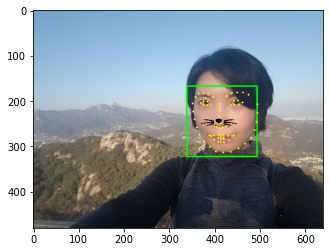

In [10]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# Í≤∞Í≥º Ï∂úÎ†•
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

img_show ÎåÄÏã† img_rgbÎ•º ÏÇ¨Ïö©Ìï®ÏúºÎ°úÏç®, bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÏó¨ ÏµúÏ¢Ö Í≤∞Í≥ºÎ¨ºÏùÑ Ï∂úÎ†•ÌïúÎã§. 

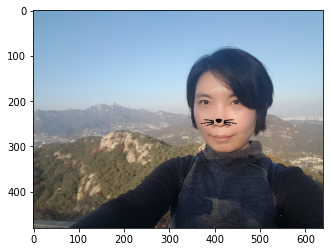

In [11]:
# bounding box, landmark Ï†úÍ±∞
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### - Ïù¥ÎØ∏ÏßÄ Î∏îÎ†åÎî©: opencv Ïùò cv2.addWeighted() ÏÇ¨Ïö©

Ïä§Ìã∞Ïª§Î•º ÏûêÏó∞Ïä§ÎüΩÍ≤å Î≥¥Ïù¥Í∏∞ ÏúÑÌï¥ÏÑúÎäî Ïä§Ìã∞Ïª§ Îí§Î°ú ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÍ∞Ä Í∞ôÏù¥ Î≥¥Ïù¥ÎèÑÎ°ù Ìï¥Ïïº ÌïúÎã§. cv2.addWeighted()Î•º Ï∞∏Í≥†ÌïòÏó¨ Ïä§Ìã∞Ïª§ÏôÄ ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÎ•º Î∏îÎ†åÎî©ÌïòÏòÄÎã§. cv2.addWeighted()Îäî Í∞ôÏùÄ ÌÅ¨Í∏∞Ïùò Ïù¥ÎØ∏ÏßÄÎÅºÎ¶¨ ÏÇ¨Ïö©Í∞ÄÎä•ÌïòÎØÄÎ°ú Í∞ôÏùÄ ÌÅ¨Í∏∞Ïù∏ sticker_areaÏôÄ img_stickerÎ•º Î∏îÎ†åÎî©ÌïòÏòÄÎã§. 

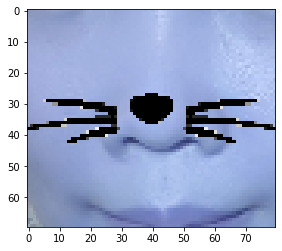

In [13]:
added_image = cv2.addWeighted(img_sticker, 0.1,sticker_area,0.9, 0)
plt.imshow(added_image)
plt.show()

Î∏îÎ†åÎî©Ìïú Ïù¥ÎØ∏ÏßÄÎ•º ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Î∂ôÏó¨ Ï£ºÏóàÎã§. Î∏îÎ†åÎî©Ìïú Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÏôÄ ÏÉâÏù¥ Îã¨Îùº Î∂ôÏù∏ Ìã∞Í∞Ä ÎÇòÏÑú ÏµúÎåÄÌïú Ìã∞Í∞Ä Ïïà ÎÇòÎèÑÎ°ù ÏúÑÏùò ÏΩîÎìúÏóêÏÑú cv2.addWeighted()Ïùò Ïà´ÏûêÎ•º Ï°∞Ï†ïÌïòÏòÄÎã§.

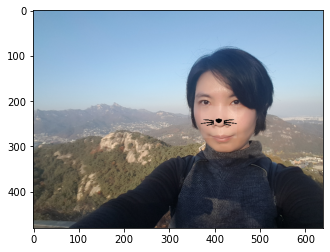

In [14]:
sticker_area = img_bgr[refined_y:refined_y+added_image.shape[0], refined_x:refined_x+added_image.shape[1]]
img_bgr[refined_y:refined_y+added_image.shape[0], refined_x:refined_x+added_image.shape[1]] = \
    np.where(added_image==255,sticker_area,added_image).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# Îã§Î•∏ Í∞ÅÎèÑÏùò ÏÇ¨ÏßÑ

ÏñºÍµ¥Ïùò Í∞ÅÎèÑÍ∞Ä Î≥ÄÌï† Îïå Ïä§Ìã∞Ïª§Í∞Ä Ïñ¥ÎñªÍ≤å Ï†ÅÏö©ÎêòÎäîÏßÄ ÏïåÏïÑÎ≥¥Í∏∞ ÏúÑÌï¥ÏÑú ÏñºÍµ¥Ïù¥ Í∏∞Ïö∏Ïñ¥ÏßÑ ÏÇ¨ÏßÑÏúºÎ°ú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©ÌïòÏòÄÎã§. 

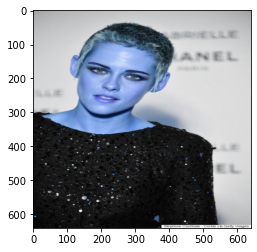

In [15]:
# Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/st.jpeg'
img_bgr = cv2.imread(my_image_path) #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÍ∏∞
img_bgr = cv2.resize(img_bgr, (640, 640)) # 640x640 Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy() #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_bgr)
plt.show()

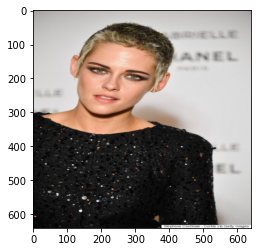

In [16]:
# ÏÉâ Î≥¥Ï†ïÏ≤òÎ¶¨
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. ÏñºÍµ¥ Í≤ÄÏ∂ú & ÎûúÎìúÎßàÌÅ¨ Í≤ÄÏ∂ú 

### 1) bound box ÏúÑÏπò Ï∞æÍ∏∞

In [17]:
# dlibÌôúÏö©Ìïú hog detcter ÏÑ†Ïñ∏
import dlib
detector_hog = dlib.get_frontal_face_detector() #- detector ÏÑ†Ïñ∏
print("üå´üõ∏")

# bounding box Ï∂îÏ∂ú
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) #- (image, num of img pyramid)
print("üå´üõ∏")

üå´üõ∏
üå´üõ∏


rectangles[[(139, 118) (324, 304)]]


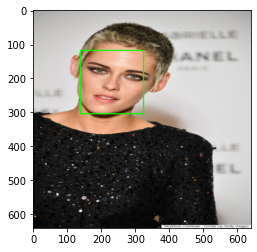

In [18]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï¢åÌëúÎ°ú ÌëúÏãú
print(dlib_rects) 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2) landmark ÏúÑÏπò Ï∞æÍ∏∞ 

In [19]:
# landmark Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

# landmark predictor
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

üå´üõ∏
68


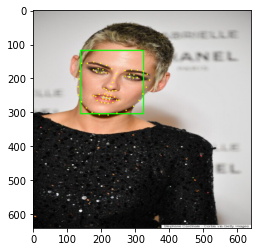

In [20]:
# ÎûúÎìúÎßàÌÅ¨Î•º ÏòÅÏÉÅÏóê Ï∂úÎ†•
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

ÏñºÍµ¥Ïùò Í∞ÅÎèÑÍ∞Ä Î≥ÄÌïòÏó¨ÎèÑ bounding boxÏôÄ landmarkÎäî Ïûò Ï∞æÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

## 3. Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÏúÑÏπò ÌôïÏù∏

In [21]:
# Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] 
    w = (landmark[30][0] - landmark[36][0])*2
    h = (landmark[48][1] - landmark[2][1])*2
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(228, 225)
(x,y) : (228,225)
(w,h) : (102,98)


In [22]:
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ resize 
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(98, 102, 3)


In [23]:
# x, y Ï¢åÌëú Ï°∞Ï†ï
refined_x = x - h // 2 # left
refined_y = y - h // 2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (179,176)


- (refined_x, refined_y)Ïùò Ï¢åÌëúÎäî (177, 176)Ïù¥ ÎêòÏñ¥Ïïº ÌïòÎÇò refined_xÎ•º 177Î°ú ÎßûÏ∂îÎ©¥ ÏóêÎü¨ Î©îÏãúÏßÄÍ∞Ä Îñ†ÏÑú 2Î°ú Í≥ÑÏÇ∞ÌïòÏó¨ 179Î°ú ÏÑ§Ï†ïÌïòÏòÄÎã§.

## 4. Ïä§Ìã∞Ïª§ Ï†ÅÏö©

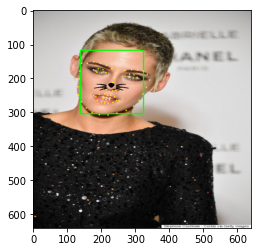

In [24]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# Í≤∞Í≥º Ï∂úÎ†•
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

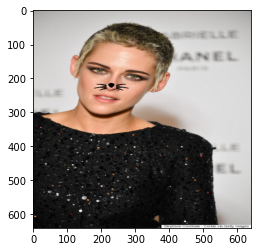

In [25]:
# bounding box, landmark Ï†úÍ±∞
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### - Ïä§Ìã∞Ïª§ ÌöåÏ†ÑÌï¥ÏÑú Î∂ôÏù¥Í∏∞

ÏñºÍµ¥Ïùò Í∞ÅÎèÑÏóê Îî∞Îùº Ïä§Ìã∞Ïª§Ïùò Í∞ÅÎèÑÎèÑ Î≥ÄÌïòÍ≤å ÌïòÍ≥† Ïã∂Ïñ¥ÏÑú Ïä§Ìã∞Ïª§Î•º ÌöåÏ†ÑÌïòÏòÄÎã§. Ïù¥ÎØ∏ÏßÄÎ•º ÌöåÏ†ÑÏãúÌÇ¨ Í∞ÅÎèÑÎäî Í≥ÑÏÇ∞ÌïòÎ†§Í≥† ÌïòÏòÄÏúºÎÇò Í≤∞Íµ≠ Î∞©Î≤ïÏùÑ Ï∞æÏßÄ Î™ªÌïòÏòÄÎã§. ÎåÄÏ∂© Ïù¥ÎØ∏ÏßÄÍ∞Ä -30ÎèÑ Ï†ïÎèÑ ÌöåÏ†ÑÌïú Í≤É Í∞ôÏïÑ Í∞ÅÎèÑÎ•º -30ÎèÑÎ°ú ÏÑ§Ï†ïÌïòÏòÄÎã§. Ïù¥ÎØ∏ÏßÄÎ•º ÌöåÏ†ÑÌïòÎäî ÏΩîÎìúÎäî [Ïó¨Í∏∞](https://076923.github.io/posts/Python-opencv-6/)Î•º Ï∞∏Í≥†ÌïòÏòÄÎã§.

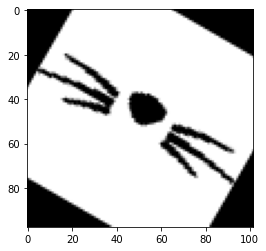

In [26]:
# Í∞ÅÎèÑ Í≥ÑÏÇ∞

# Ïä§Ìã∞Ïª§ ÌöåÏ†Ñ
matrix = cv2.getRotationMatrix2D((w/2,h/2), -30, 1)
img_sticker= cv2.warpAffine(img_sticker, matrix, (w, h))
plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
plt.show()

ÌöåÏ†ÑÌïú Ïä§Ìã∞Ïª§Î•º ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©ÌïòÏòÄÎã§. Í∑∏Îü¨ÎÇò Ïä§Ìã∞Ïª§Î•º ÌöåÏ†ÑÌïú ÌõÑ Î≥¥Ïù¥Îäî Í≤ÄÏùÄ Î∂ÄÎ∂ÑÎèÑ Í∞ôÏù¥ ÎÇòÏôîÎã§. Í≤ÄÏùÄ Î∂ÄÎ∂ÑÏùÑ Ï†úÍ±∞ÌïòÍ≥† Ïã∂ÏóàÏúºÎÇò Î∞©Î≤ïÏùÑ ÏïåÏßÄ Î™ªÌïòÏòÄÎã§.

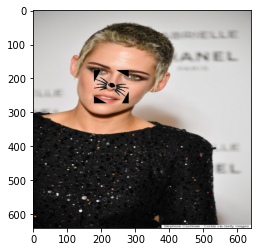

In [27]:
# bounding box, landmark Ï†úÍ±∞
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 5. Î¨∏Ï†úÏ†ê Ï∞æÍ∏∞

### Î¨∏Ï†úÏ†êÍ≥º Ìï¥Í≤∞Ï±Ö

- ÏÇ¨ÏßÑÏùò ÏÇ¨Ïù¥Ï¶à     
  ÏÇ¨ÏßÑÏùò bounding boxÎ•º Ï∞æÏßÄ Î™ªÌïòÏó¨ ÏÇ¨ÏßÑÏùò ÏÇ¨Ïù¥Ï¶àÎ•º Î≥ÄÍ≤ΩÌñàÎçîÎãà Ï∞æÏùÑ Ïàò ÏûàÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏóàÎã§. Ï¶â ÏÇ¨ÏßÑÏùò ÏÇ¨Ïù¥Ï¶àÍ∞Ä ÏñºÍµ¥ Í≤ÄÏ∂úÏóê ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®ÏùÑ Ïïå Ïàò ÏûàÎã§. 
  

- ÏñºÍµ¥ Í∞ÅÎèÑÍ∞Ä Îã§Î•∏ ÏÇ¨ÏßÑ         
  ÏñºÍµ¥Ïùò Í∞ÅÎèÑÍ∞Ä Îã¨ÎùºÏßÄÎ©¥ Ïä§Ìã∞Ïª§Ïùò Í∞ÅÎèÑÎèÑ Îã¨ÎùºÏ†∏Ïïº ÌïúÎã§. ÏúÑÏùò ÏòàÏôÄ Í∞ôÏù¥ Ïä§Ìã∞Ïª§Î•º ÌöåÏ†ÑÌïòÎ©¥ Ìï¥Í≤∞Ìï† Ïàò ÏûàÎã§.      


- Î©ÄÎ¶¨ ÏûàÎäî ÏÇ¨ÏßÑ    
  Î©ÄÎ¶¨ ÏûàÎäî ÏÇ¨ÏßÑÎèÑ Ïñ¥Îäê Ï†ïÎèÑ ÍπåÏßÄÎäî ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÌïòÏòÄÏúºÎÇò Îçî Î©ÄÎ¶¨ Îñ®Ïñ¥Ï†∏ ÏûàÏúºÎ©¥ ÏñºÍµ¥Ïùò Ï¢åÌëúÎ•º Íµ¨ÌïòÍ∏∞ Ïñ¥Î†§ÏõåÏÑú Ï∞æÏßÄ Î™ªÌïòÎäî Í≤É Í∞ôÎã§. Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÌôïÎåÄÌïòÏó¨ ÏñºÍµ¥Ïùò Ï¢åÌëúÎ•º Ï∞æÏúºÎ©¥ ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§. (Ïù¥ÎØ∏ÏßÄ ÌôïÎåÄÎäî Î™ª ÌïòÏòÄÎã§.)      
![](https://images.velog.io/images/guide333/post/5955b071-13bf-444d-a80b-44fbbbe1f5fd/Screenshot%20from%202021-01-17%2001-31-30.png)

- Ïó¨Îü¨ Î™ÖÏù¥ Í∞ôÏù¥ ÏûàÎäî ÏÇ¨ÏßÑ
  LMSÏóê Ïç® ÏûàÎäî ÏΩîÎìúÎ•º Í∑∏ÎåÄÎ°ú Ïì∞Î©¥ bounding boxÎäî Ï∞æÏùÑ Ïàò ÏûàÏúºÎÇò landmarkÎäî 1Î™ÖÎßå ÎÇòÏò®Îã§. Ïä¨ÎûôÏóê Ïò¨ÎùºÏò® Í∏ÄÏùÑ Ï∞∏Ï°∞ÌïòÏó¨ ```for idx, point in enumerate(list_points):```ÏóêÏÑú ```for idx, point in enumerate(landmark):```Î°ú Î∞îÍæ∏ÏóàÎçîÎãà landmarkÎ•º Î™®Îëê Ï∞æÏùÑ Ïàò ÏûàÏóàÎã§. 
  ÏñºÍµ¥Ïùò Ïä§Ìã∞Ïª§Ïùò ÌÅ¨Í∏∞ÏôÄ Í∞ÅÍ∞ÅÏùò ÏñºÍµ¥ÏóêÏÑú Ïä§Ìã∞Ïª§Î•º Î∂ôÏùº ÏúÑÏπòÎ•º Î≥ÄÍ≤ΩÌïúÎã§Î©¥ Î™®Îì† ÏñºÍµ¥Ïóê Ïä§Ìã∞Ïª§Î•º Î∂ôÏùº Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§. Í∑∏Îü¨ÎÇò Ïã§Ï†úÎ°ú ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏßÄÎäî Î™ªÌñàÎã§.
![](https://images.velog.io/images/guide333/post/3c1d57fd-aec4-438c-8ef7-893b54ca2c56/Screenshot%20from%202021-01-17%2001-01-27.png)
 
- ÎàÑÏõå ÏûàÎäî ÏÇ¨ÏßÑ
  - ÎàÑÏõå ÏûàÎäî ÏÇ¨ÏßÑÏùÑ Ïó¨Îü¨ Ïû• Ïã§ÌóòÌï¥ Î≥¥ÏïòÎã§. ÏòÜÏúºÎ°ú ÎàÑÏõ†Í±∞ÎÇò ÏúÑÎ°ú ÎàÑÏö¥ Í≤ΩÏö∞Îäî ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ Î™ªÌïòÏòÄÎã§. ÌäπÏù¥ÌïòÍ≤åÎèÑ ÏïÑÎûòÏùò Í∑∏Î¶ºÏùÄ bounding boxÎäî Ï∞æÏßÄ Î™ªÌïòÏòÄÏúºÎÇò facial landmarkÎ•º Î∞îÎã•ÏóêÏÑú Ï∞æÏïòÎã§. Ïôú Ïù¥Î†áÍ≤å ÎêòÎäîÏßÄ Í∂ÅÍ∏àÌïòÎã§. 
![](https://images.velog.io/images/guide333/post/f8df8f45-a818-412a-832c-d3df6b258eef/Screenshot%20from%202021-01-12%2017-46-03.png)
  - ÏïÑÎûò ÏÇ¨ÏßÑÍ≥º Í∞ôÏù¥ ÏòÜÏúºÎ°ú ÌåîÏùÑ Í∏∞ÎåÄÍ≥† ÎàÑÏõå ÏûàÎäî ÏÇ¨ÏßÑÏùÄ ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÌïòÏòÄÏúºÎÇò ÏñºÍµ¥Ïù¥ Ï†ïÎ©¥ÏùÑ Î≥¥Í≥† ÏûàÏßÄ ÏïäÏïÑÏÑúÏù∏ÏßÄ, Ïä§Ìã∞Ïª§Í∞Ä Ï∞åÍ∑∏Îü¨ÏßÄÎäî ÌòÑÏÉÅÏùÑ Î≥¥ÏòÄÎã§. 
  ![](https://images.velog.io/images/guide333/post/3407c890-3168-4a9e-877a-7bb829779f1c/Screenshot%20from%202021-01-12%2017-47-44.png)
  - ÏúÑÏùò Îëê Í≤ΩÏö∞Î•º Î≥º Îïå, Ïñ¥ÎñªÍ≤å ÏûàÎì† ÏûêÏÑ∏Îäî ÏÉÅÍ¥Ä ÏóÜÍ≥†, ÏñºÍµ¥Ïùò Ïù¥Î™©Íµ¨ÎπÑÏôÄ Ïó∞Í¥ÄÎêú Í≤É Í∞ôÎã§Îäî ÏÉùÍ∞ÅÏù¥ Îì§ÏóàÎã§. ÏñºÍµ¥Ïùò Ïù¥Î™©Íµ¨ÎπÑÍ∞Ä Î™®Îëê Î≥¥Ïù¥Í≥† Ïù¥Î™©Íµ¨ÎπÑÏùò Ï¢åÌëúÍ∞Ä Ï£ºÏñ¥ÏßÑ Î™®Îç∏(ibub 300-W Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌïôÏäµÌïú pretrained model)Í≥º Í∞ôÏúºÎ©¥ ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ Ìï† Ïàò ÏûàÎã§.
  
  
- ÎçîÎü¨Ïö¥ ÏñºÍµ¥ ÏÇ¨ÏßÑ     
  ÏñºÍµ¥Ïóê Î¨¥ÏóáÏù∏Í∞Ä Î¨ªÏúºÎ©¥ Ïù∏ÏãùÌïòÎäîÏßÄÎ•º Ïã§ÌóòÌï¥ Î≥¥ÏïòÎäîÎç∞, Ïù¥Î™©Íµ¨ÎπÑÍ∞Ä Î™®Îëê Î≥¥Ïó¨ÏÑúÏù∏ÏßÄ ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÌïòÏòÄÎã§. Í∑∏Îü¨ÎÇò ÏñºÍµ¥ÏùÑ ÏôºÏ™ΩÏúºÎ°ú ÌãÄÏñ¥Ï†∏ ÏûàÏñ¥ Ïä§Ìã∞Ïª§Í∞Ä ÏñºÍµ¥ Î∞îÍπ•ÏúºÎ°ú ÎÇòÍ∞îÎã§.
 ![](https://images.velog.io/images/guide333/post/d4366b26-5909-4228-af70-f3bc1601bbc8/Screenshot%20from%202021-01-12%2017-48-00.png)
- Ïù¥ÎØ∏ÏßÄÏùò Î∞ùÍ∏∞      
  Î∞ùÍ∏∞Î•º Î≥ÄÍ≤ΩÌïòÏòÄÏùÑ Îïå Ïù¥Î™©Íµ¨ÎπÑÍ∞Ä Î≥¥Ïù¥Îäî ÏÇ¨ÏßÑÎì§ÏùÄ ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÌïòÏòÄÏúºÎÇò, ÎÑàÎ¨¥ Ïñ¥Îë°Í±∞ÎÇò Î∞ùÏïÑ Ïù¥Î™©Íµ¨ÎπÑÍ∞Ä Î™®Îëê Î≥¥Ïù¥ÏßÄ ÏïäÎäî Í≤ΩÏö∞Îäî Ï∞æÏßÄ Î™ªÌïòÏòÄÎã§. 
 ![](https://images.velog.io/images/guide333/post/d0bc73fb-3f72-4152-a59f-7487564537cd/Screenshot%20from%202021-01-12%2017-48-18.png)
 ![](https://images.velog.io/images/guide333/post/0fd0eb4f-6649-4c22-8c46-fb7e606feae6/Screenshot%20from%202021-01-12%2017-48-37.png)

- ÎààÏùÑ Í∞êÍ≥† ÏûàÎäî ÏÇ¨ÏßÑ   
  ÎààÏùÑ Í∞êÍ≥† ÏûàÍ±∞ÎÇò ÏõÉÏñ¥ÏÑú ÎààÏù¥ Ï†ëÌûå Í≤ΩÏö∞ÏóêÎèÑ ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÌïòÏòÄÎã§. ÌäπÌûà ÌîºÎ∂ÄÏÉâÏù¥ Í≤ÄÏùÄ Í≤ΩÏö∞, Ïú°ÏïàÏúºÎ°úÎäî Ïù¥Î™©Íµ¨ÎπÑÍ∞Ä Ïûò Î≥¥Ïù¥ÏßÄ ÏïäÎäî Î∂ÄÎ∂ÑÏù¥ ÏûàÏßÄÎßå ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÌïòÎäî Í≤ÉÏù¥ Ïã†Í∏∞ÌñàÎã§.
  ![](https://images.velog.io/images/guide333/post/cf2c9456-3df0-4894-9468-65c09ea757ad/Screenshot%20from%202021-01-12%2017-54-10.png)
![](https://images.velog.io/images/guide333/post/6c46dd23-dccb-47b8-9086-00a1e3c7df2b/Screenshot%20from%202021-01-12%2019-36-52.png)
![](https://images.velog.io/images/guide333/post/39d5ea5d-b6f0-429c-857b-127d9bc5570a/Screenshot%20from%202021-01-12%2019-36-43.png)

  
### Í≤∞Î°†
- Îã§ÏñëÌïú ÏÇ¨ÏßÑÏùÑ Í∞ÄÏßÄÍ≥† Ïã§ÌóòÏùÑ Ìï¥ Î≥¥ÏïòÏùÑ Îïå, Ïù¥Î™©Íµ¨ÎπÑÍ∞Ä Ï°∞Í∏àÏî©Ïù¥ÎùºÎèÑ Î™®Îëê ÎÇòÏò¨ Í≤ΩÏö∞ÏóêÎßå bounding boxÏôÄ facial landmarkÎ•º Ï∞æÎäî Í≤É Í∞ôÎã§. Ïù¥Î™©Íµ¨ÎπÑ Ï§ë ÌïòÎÇòÍ∞Ä Ïûò ÎÇòÏò§ÏßÄ ÏïäÎäî Í≤ΩÏö∞(ÎßàÏä§ÌÅ¨Î•º ÎÅºÍ±∞ÎÇò ÏòÜÏñºÍµ¥Îßå ÎÇòÏò® Í≤ΩÏö∞)ÎÇò ÏñºÍµ¥Ïù¥ ÎÑàÎ¨¥ ÏûëÏùÄ Í≤ΩÏö∞ÏóêÎäî ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ Ìï† Ïàò ÏóÜÏóàÎã§. Ïù¥Î™©Íµ¨ÎπÑÏùò Ï¢åÌëúÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ÏÑúÍ∞Ä Í∑∏ Ïù¥Ïú†Ïù∏ Í≤É Í∞ôÎã§. 
- ÏñºÍµ¥Ïùò ÏúÑÏπòÍ∞Ä ÏúÑÏïÑÎûòÍ∞Ä ÏïÑÎãàÎùº Îã§Î•∏ Î∞©Ìñ•Ïùº Îïå(Îí§ÏßëÏùÄ ÏñºÍµ¥Ïù¥ÎÇò ÏñºÍµ¥Ïù¥ ÏôºÏ™ΩÏù¥ÎÇò Ïò§Î•∏Ï™ΩÏúºÎ°ú ÎàÑÏõå ÏûàÎäî Í≤ΩÏö∞) ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ Ìï† Ïàò ÏóÜÏóàÎã§. Ï£ºÏñ¥ÏßÑ Î™®Îç∏ÏóêÏÑú Î≤óÏñ¥ÎÇòÎäî Í≤ΩÏö∞ÏóêÎèÑ ÏñºÍµ¥ Í≤ÄÏ∂úÏù¥ Ïïà ÎêòÎäî Í≤É Í∞ôÎã§.
- ÏñºÍµ¥ÏùÑ ÏôºÏ™ΩÏù¥ÎÇò Ïò§Î•∏Ï™ΩÏúºÎ°ú Ìä∏Îäî Í≤ΩÏö∞ÏóêÎäî ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÌïòÎÇò ÏñºÍµ¥ ÏôºÏ™ΩÍ≥º Ïò§Î•∏Ï™ΩÏùò ÎπÑÏú®Ïù¥ Í∞ôÏßÄ ÏïäÏïÑÏÑú Ïä§Ìã∞Ïª§Í∞Ä Ï∞åÍ∑∏Îü¨ ÏßÄÍ±∞ÎÇò ÏñºÍµ¥ Î∞ñÏúºÎ°ú ÌäÄÏñ¥ ÎÇòÍ∞ÑÎã§. Ïä§Ìã∞Ïª§Ïùò Ï¢åÌëúÎ•º Ï°∞Ï†ïÌïòÎ©¥ Ï†úÎåÄÎ°ú ÎÇòÏò¨ Í≤É Í∞ôÏùÄ ÏÉùÍ∞ÅÏùÄ ÎìúÎäîÎç∞, ÏôºÏ™ΩÍ≥º Ïò§Î•∏Ï™ΩÏùò ÎπÑÏú®ÏùÑ Ï∞æÍ≥† Ï°∞Ï†ïÌïòÎäî Í≤ÉÏù¥ ÏâΩÏßÄÎäî ÏïäÏùÑ Í≤É Í∞ôÎã§. 
- ÏñºÍµ¥Ïùò Í∞ÅÎèÑÏóê Îî∞Îùº Ïä§Ìã∞Ïª§Ïùò Í∞ÅÎèÑÎèÑ Í≤∞Ï†ïÌï¥ Ï£ºÏñ¥Ïïº ÌïúÎã§. Ïù¥ÎØ∏ÏßÄÏùò ÌöåÏ†Ñ Í∞ÅÎèÑÎäî ÏñºÍµ¥Ïùò Í∞ÅÎèÑÏôÄ Ïó∞Í≤∞ÎêòÍ≤å Ìï† Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§. 
- ÏÇ¨ÏßÑÏùò ÏÇ¨Ïù¥Ï¶àÏóê Îî∞Îùº ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ Ìï† ÏàòÎèÑ, Î™ªÌï† ÏàòÎèÑ ÏûàÏóàÎã§. ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÏúÑÌï¥ÏÑúÎäî Ïù¥ÎØ∏ÏßÄÏùò ÏÇ¨Ïù¥Ï¶à Ïó≠Ïãú Ï§ëÏöîÌïòÎã§. 

### ÏßàÎ¨∏
    
1. Ïã§Ìñâ ÏÜçÎèÑÍ∞Ä Ï§ëÏöîÌï†Íπå?    
   ÏñºÍµ¥ÏùÑ Ïù∏ÏãùÌïòÎäî ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î¶∞Îã§Î©¥ ÏÜåÎπÑÏûêÎì§ÏùÄ Ïù¥ Ïï±Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌïòÏßÄ ÏïäÎäî Ï§Ñ ÏïåÍ≥† Ïù¥ Ïï±ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùÑ Í≤ÉÏù¥Îã§. LMSÏóêÏÑú Ï£ºÏñ¥ÏßÑ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÌïòÍ≥† Ïä§Ìã∞Ïª§Î•º Î∂ôÏù¥Îäî Í≤ÉÏùÄ Îπ®Î¶¨ Ïã§ÌñâÎêòÏóàÎã§.    
   
2. Ïä§Ìã∞Ïª§Ïï±ÏùÑ ÎßåÎì§ Îïå Ï†ïÌôïÎèÑÍ∞Ä ÏñºÎßàÎÇò Ï§ëÏöîÌï†Íπå?    
   Îã§ÏñëÌïú Ïù∏Î¨º ÏÇ¨ÏßÑÏóêÏÑú ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ Ï†úÎåÄÎ°ú ÌïòÏßÄ Î™ªÌïòÏó¨ Ïä§Ìã∞Ïª§Î•º Î∂ôÏù¥ÏßÄ Î™ªÌïúÎã§Î©¥ ÏÇ¨Ïö©ÏûêÎì§ÏùÄ Ïù¥ Ïï±ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùÑ Í≤ÉÏù¥Îã§. Îã§ÏñëÌïú ÏÇ¨Ïù¥Ï¶à, Îã§ÏñëÌïú Ìè¨Ï¶à, ÏÇ¨ÏßÑÏùò Î∞ùÍ∏∞ÎÇò Í±∞Î¶¨, Í∑∏Î¶¨Í≥† ÎßéÏùÄ ÏÇ¨ÎûåÏù¥ Ìïú ÏÇ¨ÏßÑÏóê ÏûàÎäî Í≤ΩÏö∞ Îì± Îã§ÏñëÌïú ÏÉÅÌô©ÏóêÏÑú ÏñºÍµ¥ Ïù∏ÏãùÏùÑ Ìï¥ÎÇ¥Îäî Í≤ÉÏù¥ Ï§ëÏöîÌïòÎã§. LMSÏóê Ï£ºÏñ¥ÏßÑ ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°úÎäî Îã§ÏñëÌïú ÏÉÅÌô©ÏóêÏÑú ÏñºÍµ¥ Ïù∏ÏãùÏùÑ ÌïòÏßÄ Î™ªÌïòÎäî Í≤ΩÏö∞Í∞Ä ÏûàÏúºÎØÄÎ°ú Ïä§Ìã∞Ïª§ Ïï±ÏúºÎ°úÏÑúÏùò Ïã§Ïö©ÏÑ±ÏùÄ Ï†ÅÏùÄ Í≤É Í∞ôÎã§. Í∞ÅÍ∞ÅÏùò Í≤ΩÏö∞Ïóê Î∂ÄÌï©ÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ Î™®Îì† ÏÉÅÌô©ÏóêÏÑú ÏñºÍµ¥ Ïù∏ÏãùÏùÑ Ìï† Ïàò ÏûàÎäî Ïï±ÏùÑ ÎßåÎì§Î©¥ Ï¢ãÍ≤†Îã§. 

# ÌõÑÍ∏∞
- Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú **Ïñ¥Î†§Ïõ†Îçò Ï†ê** 
  1. Ïä§Ìã∞Ïª§ÏôÄ Ïä§Ìã∞Ïª§Î•º Î∂ôÏùº Í≥≥Ïùò Ï¢åÌëú ÏÑ§Ï†ï
  2. np.where()
  3. Ïä§Ìã∞Ïª§ Í∞ÅÎèÑ Î≥ÄÌôî
  4. opencv Ïùò cv2.addWeighted()    
  
  
- ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÎ©¥ÏÑú **ÏïåÏïÑÎÇ∏ Ï†ê** ÌòπÏùÄ **ÏïÑÏßÅ Î™®Ìò∏Ìïú Ï†ê** 
  - ÏñºÍµ¥ Í≤ÄÏ∂úÏóê ÏûàÏñ¥ÏÑú ÌïÑÏöîÌïú Ï°∞Í±¥
  - Í∞Å ÏΩîÎìúÏùò ÏùòÎØ∏ÏôÄ Î≥ÄÏàò Î≥ÄÍ≤Ω
  - ÏñºÍµ¥Ïùò Í∞ÅÎèÑ Í≥ÑÏÇ∞: ÏïÑÏßÅ Î∞©Î≤ïÏùÑ Î™®Î¶Ñ
        
        
- Î£®Î∏åÎ¶≠ ÌèâÍ∞Ä ÏßÄÌëúÎ•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ **ÏãúÎèÑÌïú Í≤ÉÎì§**         
    1Î≤à(ÏõêÎ≥∏Í≥º Ïä§Ìã∞Ïª§ ÏÇ¨ÏßÑÏù¥ Ï†ïÌôïÌûà Ìï©ÏÑ±)/ 2Î≤à(Í≥†ÏñëÏù¥ ÏàòÏóºÏùò ÏúÑÏπòÍ∞Ä ÏõêÎ≥∏ ÏñºÍµ¥Ïóê Ïñ¥Ïö∏Î¶¨Í≤å Ï∂úÎ†•)Ïùò ÏßÄÌëúÎ•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ Î∞∞Ïö¥ ÎÇ¥Ïö©ÏùÑ ÍººÍººÌûà Î≥¥Í≥† ÏΩîÎìúÎ•º ÏçºÍ≥†, Ï¢åÌëúÎÇò ÏÇ¨Ïù¥Ï¶à Î¨∏Ï†úÎäî landmark Í∑∏Î¶ºÏùÑ Î≥¥Í≥† Ï¢åÌëú Í≥ÑÏÇ∞ÏùÑ ÌïòÏó¨ Ìï¥Í≤∞ÌïòÏòÄÎã§.    
    3Î≤à(Î≥ÄÏàòÏóê Îã§Î•∏ ÏòÅÌñ•ÎèÑ Î∂ÑÏÑù)ÏùÑ ÏúÑÌï¥ÏÑúÎäî Îã§ÏñëÌïú ÏÇ¨ÏßÑÏùÑ Ï∞æÏïÑ Ïã§ÌñâÌï¥ Î≥¥ÏïòÎã§. 
         
    
- **ÏûêÍ∏∞ Îã§Ïßê**            
    Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Îäî Îπ®Î¶¨ ÎÅùÎÇº Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îùº ÏÉùÍ∞ÅÌñàÏúºÎÇò Ïä§Ìã∞Ïª§Ïùò Í∞ÅÎèÑÎ•º Î≥ÄÌôîÏãúÌÇ§Îäî Î≤ïÍ≥º opencv Ïùò cv2.addWeighted)Ïùò ÏÇ¨Ïö©Î≤ïÏùÑ Ï∞æÍ≥† Ï†ÅÏö©ÌïòÎäêÎùº ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î†∏Îã§. Ïò®ÎùºÏù∏ÏúºÎ°ú Ìï¥ÏÑú ÎßêÎ°úÎßå ÏÑ§Î™ÖÏùÑ Îì§ÏúºÎ†§Îãà Îçî Ìó§Îß∏Îçò Í≤É Í∞ôÎã§. Í∑∏ÎûòÎèÑ ÎèÑÏõÄÏùÑ Ï£ºÏã† Î∂ÑÎì§Ïù¥ ÏûàÏñ¥ÏÑú Í∞êÏÇ¨ÌñàÎã§.       
    ÏïÑÏßÅÎèÑ ÏΩîÎìúÎ•º Î≥¥Í≥† Î∂ÑÏÑùÌïòÎäî Îä•Î†•Ïù¥ Î∂ÄÏ°±Ìïú Í≤É Í∞ôÎã§. ÏΩîÎìúÍ∞Ä Î¨¥ÏóáÏùÑ ÏùòÎØ∏ÌïòÎäîÏßÄÎÇò ÏΩîÎìú ÎÇ¥ Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏùÑ Î∞îÍøîÏ§òÏïº ÌïòÎäîÏßÄÏóê ÎåÄÌï¥ÏÑúÎäî Ïûò Î™∞ÎùºÏÑú Ìó§Îß§Îäî Í≤ΩÏö∞Í∞Ä ÎßéÎã§. Îçî ÎßéÏùÄ Í≤ÉÏùÑ Î∞∞Ïö∞Í≥† ÏùµÌòÄÏÑú ÏΩîÎìúÎ•º Î≥¥Í≥†ÏÑú Ïù¥Ìï¥Ìï† Ïàò ÏûàÏóàÏúºÎ©¥ Ï¢ãÍ≤†Îã§. 
    